# Sprawozdanie 2

## Tobiasz Szulc

## kod dostępny w załączonych plikach equations.py, resistors.py i smallTestGraph.txt



## Zadanie 1 Metoda Gaussa-Jordana

będę rozwiązywać układy równań metodą gaussa-jordana z pełnym poszukiwaniem elementu wiodącego i skalowaniem układu

In [1]:
import numpy as np
import random
import timeit
import equations
random.seed(0)
def test(n: int = 500):
    A = np.array([[random.uniform(-10, 10) for _ in range(n)] for _ in range(n)], dtype="float")
    b = np.array([random.uniform(-10, 10) for _ in range(n)], dtype="float")
    time = timeit.timeit(lambda: equations.gauss(A, b), number=1)
    time_lib = timeit.timeit(lambda: np.linalg.solve(A, b), number=1)
    print(f"n = {n}, time = {time}, time_lib = {time_lib}")
for i in range(10):
    test(50 * (10 + i))

n = 500, time = 8.98052824899787, time_lib = 0.004099735997442622
n = 550, time = 12.088130022995756, time_lib = 0.004029042000183836
n = 600, time = 16.38573307799379, time_lib = 0.13919194600021
n = 650, time = 20.900684830994578, time_lib = 0.03278834999946412
n = 700, time = 24.439488983996853, time_lib = 0.014227478997781873
n = 750, time = 29.870351773002767, time_lib = 0.007451591998687945
n = 800, time = 36.04666881600133, time_lib = 0.01004385299893329
n = 850, time = 43.56934616200306, time_lib = 0.01003236399992602
n = 900, time = 50.47655159400165, time_lib = 0.014626665004470851
n = 950, time = 58.72323429700191, time_lib = 0.01364651999756461


jak widać rozwiązanie biblioteczne jest dużo dużo szybsze od obecnej implementacji



## Zadanie 2 Faktoryzacja LU

zastosujemy implementacje in-situ faktoryzacji LU

wszystkie współczynniki macierzy wynikowej z pod przekątnej należą do L, pozostałe do U

Faktoryzacja LU pozwala zmniejszyć złożoność obliczeniową rozwiązywania wielu układów równań reprezentowanych taką samą macierzą, a różniących się jedynie stałymi (O(mn^3) -> O(n^3 + mn^2)

In [2]:
import numpy as np
import random
import equations
random.seed(0)
def run(n: int = 500):
    A = np.array([[random.uniform(-10, 10) for _ in range(n)] for _ in range(n)], dtype="float")
    b = np.array([random.uniform(-10, 10) for _ in range(n)], dtype="float")

    LU = equations.factorLU(A)

    print(LU)
    print(equations.calcLU(LU, b))
    print(np.linalg.solve(A, b))
    print(equations.normLU(A,LU))
    print("\n\n")
run()

[[ 6.88843703e+00  5.15908806e+00 -1.58856838e+00 ... -8.42922921e+00
  -8.59341068e+00 -2.81493370e+00]
 [-1.36641299e+00  4.00699949e+00 -1.19713556e+01 ... -2.93010235e+00
  -2.76998200e+00 -4.23811129e+00]
 [ 1.29692525e+00 -8.06586944e-02  6.66701521e+00 ...  1.90129685e+01
   9.56003331e+00  4.93197621e-01]
 ...
 [-5.13345431e-01  2.86226679e+00  3.77391565e+00 ...  7.81554568e+01
   7.83558063e+01  1.14642196e+02]
 [ 9.09056475e-01 -1.80584481e+00 -2.87991260e+00 ...  9.32519368e-01
   1.45005208e+02 -1.20092421e+02]
 [-6.44647239e-03  1.46825074e+00  3.93189643e+00 ... -4.28404513e-01
   5.00586424e-01  1.10026019e+02]]
[-0.34288047 -1.92586532  2.4003485   1.31339026 -2.2104866   2.84733861
 -0.41559518 -1.60212309 -0.32762367 -0.67721645 -0.63742393  0.84732688
  3.58685077 -0.79846953  0.27114684  0.53880919  3.21110545 -2.48242719
  1.56722443  1.81240842 -0.53599882 -0.06018406  1.81914753 -0.33837988
  1.83056824  0.68386078 -2.02845    -1.1554753   0.28447072  1.17848929

jak widać ||A - LU|| jest bardzo bliskie zeru, z czego wynika, że metoda nadaje się do użycia w przypadku tego układu równań



## Zadanie 3 Analiza obwodu elektrycznego


wykorzystam obie metody: potencjałów węzłowych i pierwsze i drugie prawo kirchoffa



1) wczytany graf z pliku

test passed


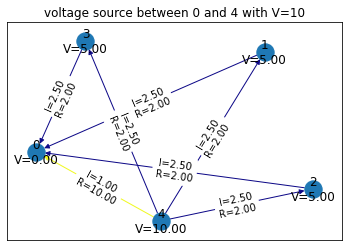

------------------------------
test passed


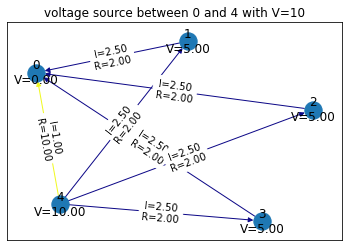

In [1]:
import resistors

with open("smallTestGraph.txt", "r") as f:
   G, E = resistors.read_graph_list(f.read())
source = (0, 4, 10)

resistors.solve_and_test(G, E, source, "kirchoff", True)
print("-"*30)
resistors.solve_and_test(G, E, source, "potential", True)


2) Erdos-Renyi

test passed


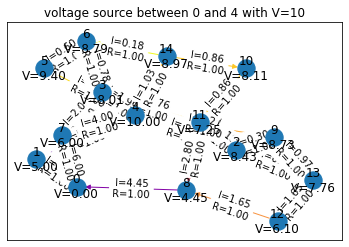

test passed


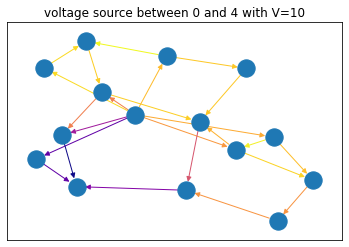

------------------------------
test passed


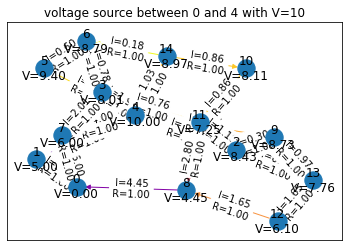

test passed


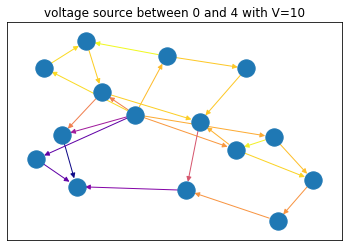

In [4]:
import resistors
import networkx
graph = networkx.erdos_renyi_graph(n=15, p=0.2)
G, E, pos = resistors.read_from_networkx(graph, 1)
source = (0, 4, 10)

resistors.solve_and_test(G, E, source, "potential",True , pos)
resistors.solve_and_test(G, E, source, "potential",False , pos)
print("-"*30)
resistors.solve_and_test(G, E, source, "kirchoff",True , pos)
resistors.solve_and_test(G, E, source, "kirchoff",False , pos)


3) kubiczny

test passed


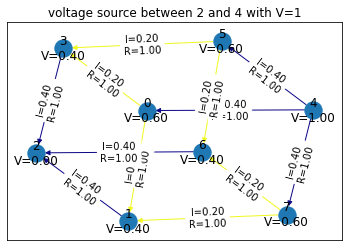

test passed


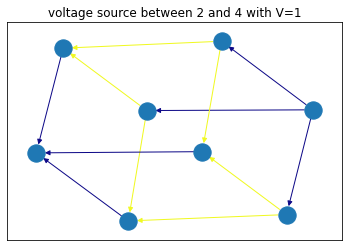

------------------------------
test passed


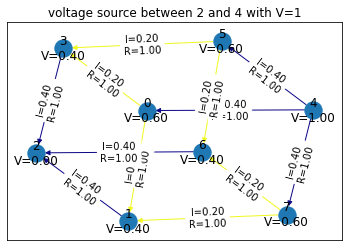

test passed


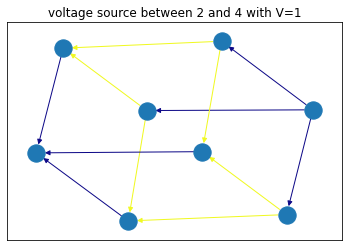

In [6]:
import resistors
import networkx
graph = networkx.cubical_graph()
G, E, pos = resistors.read_from_networkx(graph, 1)
source = (2, 4, 1)

resistors.solve_and_test(G, E, source, "potential",True , pos)
resistors.solve_and_test(G, E, source, "potential",False , pos)
print("-"*30)
resistors.solve_and_test(G, E, source, "kirchoff",True , pos)
resistors.solve_and_test(G, E, source, "kirchoff",False , pos)



4) Siatka 2d

test passed


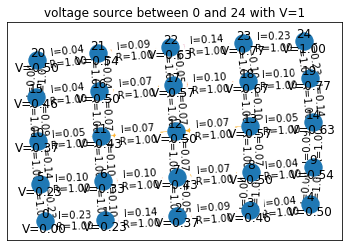

test passed


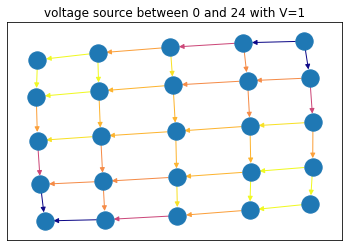

------------------------------
test passed


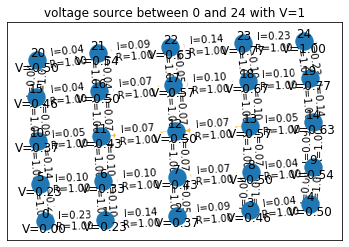

test passed


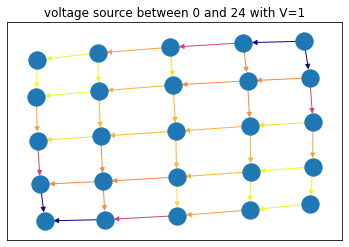

In [7]:
import resistors
import networkx
graph = networkx.grid_2d_graph(5, 5)
G, E, pos = resistors.read_from_networkx(graph, 1)
source = (0, 24, 1)

resistors.solve_and_test(G, E, source, "potential",True , pos)
resistors.solve_and_test(G, E, source, "potential",False , pos)
print("-"*30)
resistors.solve_and_test(G, E, source, "kirchoff",True , pos)
resistors.solve_and_test(G, E, source, "kirchoff",False , pos)



5) Small-World

test passed


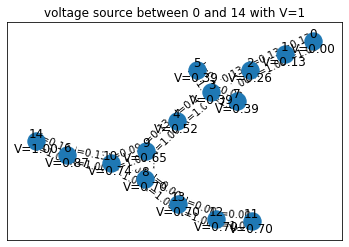

test passed


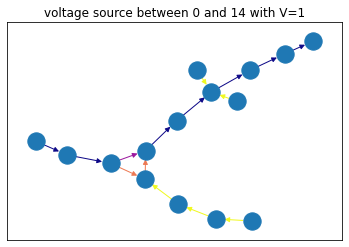

------------------------------
test passed


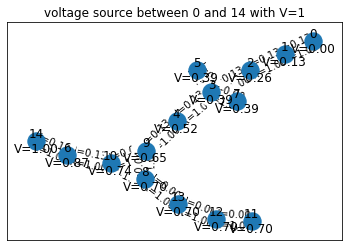

test passed


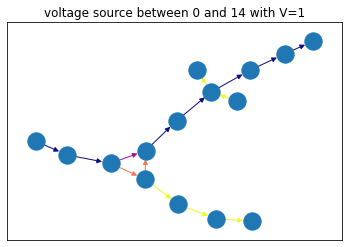

In [9]:
import resistors
import networkx
graph = networkx.watts_strogatz_graph(15,3,0.3)
G, E, pos = resistors.read_from_networkx(graph, 1)
source = (0, 14, 1)

resistors.solve_and_test(G, E, source, "potential",True , pos)
resistors.solve_and_test(G, E, source, "potential",False , pos)
print("-"*30)
resistors.solve_and_test(G, E, source, "kirchoff",True , pos)
resistors.solve_and_test(G, E, source, "kirchoff",False , pos)


w przypadku metody potencjałów węzłowych powstaje nam tyle równań co węzłów, jednakże, by uzyskać natężenia na opornikach, trzeba je policzyć osobno z róznicy potencjałów dzielonych przez opór


Wykorzystanie praw kirchoffa jest trudniejsze, ze względu na to, że trzeba znajdować cykle w grafie, jak i przez to, że powstaje nam układ nadokreślony, ale za to, od razu uzyskujemy natężenia


do rozwiązania nadokreślonego układu równań przemnożyłem lewostronnie rówanie Ax=b obustronnie przez transpozycje macierzy A, uzyskując w ten sposób układ kwadratowy


rozwiązanie składa się z części wczytującej dane (z pliku, z networkx.Graph), generującej równania (w dwóch wersjiach), generującej macierz układu i rozwiązującą go, wyliczającej brakujące wartości i wyświetlającej rozwiązanie, i testera


kierunek prądu przyjąłem, że płynie zawsze od wierzchołka o niższym indeksie do wierzchołka o wyższym, i przy rysowaniu odwracałem zwrot, jeżeli wychodziło ujemne natężenie


weryfikuje rozwiązanie poprzez sprawdzenie, czy dla każdego węzła zachodzi pierwsze prawo kirchoffa oraz dla każdego opornika, czy róznica potencjałów jest równa iloczynowi rezystancji i natężenia


do wyznaczenia cykli prostych wykorzystuję networkx.algorithms.cycle_basis , by znaleźć wszystkie potrzebne cykle w grafie bez powtórzeń krawędzi, i dodaje do tego cykle składające się z powtórzonych krawędzi, (np. wtedy, gdy między dwoma węzłami jest zarówno opornik jak i źródło)